# Myanmar Coup Fetality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [3]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [4]:
tables = camelot.read_pdf("Recent-Fatality-List-for-Jul-3-2021-Englishf.pdf", pages='1-end')
tables.n

56

In [5]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

In [6]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of \nIncident,Deceased \nDate,Organization,Place of \nIncidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi \nNyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, \nbetween 37 and \n38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko \nNa Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, \nLower \nPaunglaung \nHydro P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup \nprotests i..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, \nTanintharyi \nRegion",Toe Chal Ward,Myeik,Tanintharyi \nRegion,"On 15 February evening, 18-year old \nMaung Na..."
4,4,Thet Naing Win @ Min \nMin,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, \nMandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,834,Thiha Zaw a.k.a. Ngal Lay M,,23,U Khin Zaw,01-Jul-21,01-Jul-21,Student,Interrogation \nCenter,,Monywa,Sagaing region,"A youth named Thiha Zaw a.k.a. \nNgal Lay, who..."
835,835,Soe Min,M,34,Unknown Name,29-Jun-21,01-Jul-21,Civilian,Interrogation \nCenter,Phoe Khaung \nward,Pyay,Bago Region,The family was informed on July 1 \nthat a civ...
836,836,Moe Hein,M,55,Unknown Name,02-Jul-21,02-Jul-21,Private Teacher,In the House,20 Ward,Myingyan,Mandalay Region,On the night of July 2 at Myingyan \nTownship ...
837,837,Su Su Hlaing,F,45,Unknown Name,02-Jul-21,02-Jul-21,Former NLD,In The House,20 Ward,Myingyan,Mandalay Region,On the night of July 2 at Myingyan \nTownship ...


## Cleanup data
Cleanup newline (\n)

In [7]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,834,Thiha Zaw a.k.a. Ngal Lay M,,23,U Khin Zaw,01-Jul-21,01-Jul-21,Student,Interrogation Center,,Monywa,Sagaing region,"A youth named Thiha Zaw a.k.a. Ngal Lay, who h..."
835,835,Soe Min,M,34,Unknown Name,29-Jun-21,01-Jul-21,Civilian,Interrogation Center,Phoe Khaung ward,Pyay,Bago Region,The family was informed on July 1 that a civil...
836,836,Moe Hein,M,55,Unknown Name,02-Jul-21,02-Jul-21,Private Teacher,In the House,20 Ward,Myingyan,Mandalay Region,On the night of July 2 at Myingyan Township in...
837,837,Su Su Hlaing,F,45,Unknown Name,02-Jul-21,02-Jul-21,Former NLD,In The House,20 Ward,Myingyan,Mandalay Region,On the night of July 2 at Myingyan Township in...


Fix column names

In [8]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Adress', 'Township', 'States/Regions Remarks', ''],
      dtype=object)

In [9]:
header[-4] = 'Home Address'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [10]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,5,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,834,Thiha Zaw a.k.a. Ngal Lay M,,23,U Khin Zaw,01-Jul-21,01-Jul-21,Student,Interrogation Center,,Monywa,Sagaing region,"A youth named Thiha Zaw a.k.a. Ngal Lay, who h..."
835,835,Soe Min,M,34,Unknown Name,29-Jun-21,01-Jul-21,Civilian,Interrogation Center,Phoe Khaung ward,Pyay,Bago Region,The family was informed on July 1 that a civil...
836,836,Moe Hein,M,55,Unknown Name,02-Jul-21,02-Jul-21,Private Teacher,In the House,20 Ward,Myingyan,Mandalay Region,On the night of July 2 at Myingyan Township in...
837,837,Su Su Hlaing,F,45,Unknown Name,02-Jul-21,02-Jul-21,Former NLD,In The House,20 Ward,Myingyan,Mandalay Region,On the night of July 2 at Myingyan Township in...


Drop total number row

In [11]:
dataset = dataset.drop(index=len(dataset))

Expand combined row

In [12]:
def extract_number_from_string(str):
    numbers = [int(s) for s in str.split() if s.isdigit()]

    if len(numbers) > 0:
        return numbers[0]
    return ''

combined_row = dataset['Name'].map(extract_number_from_string)

for rowIndex in combined_row[combined_row != ''].index: 
    for i in range(combined_row[rowIndex] - 1):
        dataset = dataset.append(dataset.iloc[rowIndex])

dataset


,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,5,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."


Drop unused columns

In [13]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address', 'Deceased Date', 'Place of Incidents', 'Township', 'States/Regions'])
dataset

,Sex,Age,Date of Incident,Organization,Remarks
1,M,32,08-Feb-21,Civilian,"In another incident, 32 year old Ko Na Pwar (a..."
2,F,19,09-Feb-21,Civilian,"On February 9, peaceful anti-coup protests in ..."
3,M,18,15-Feb-21,Civilian,"On 15 February evening, 18-year old Maung Nay ..."
4,M,37,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
5,M,16,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."


## Explore data

In [14]:
dataset.describe()

,Sex,Age,Date of Incident,Organization,Remarks
count,890,890,890,890,890
unique,4,65,104,69,304
top,M,,27-Mar-21,Civilian,
freq,797,186,164,682,315


In [15]:
dataset['Sex'].value_counts()

M       797
F        58
         34
LGBT      1
Name: Sex, dtype: int64

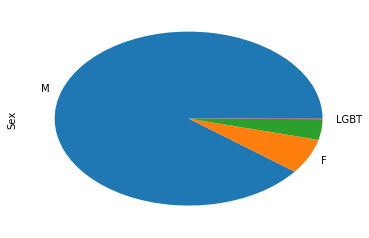

In [16]:
dataset['Sex'].value_counts().plot(kind='pie')


In [17]:
dataset['Age'].value_counts()

      186
19     97
20     38
30     31
40     28
     ... 
68      1
64      1
87      1
90      1
66      1
Name: Age, Length: 65, dtype: int64

In [22]:
def parse_age(str):
  if str.find(' ') > 0:
    return str.split()[0]
  
  return str

dataset['Age'] = dataset['Age'].apply(parse_age)

(array([  3., 169., 224., 160.,  96.,  37.,  10.,   3.,   1.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

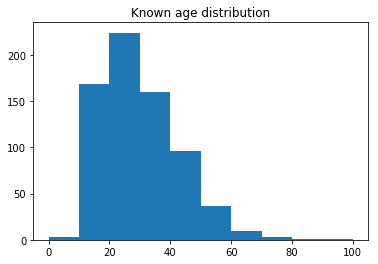

In [23]:
ages = dataset['Age'].to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])

In [24]:
dataset['Organization'].value_counts()

Civilian                                            682
Student                                             107
                                                     17
Teacher                                               7
Doctor                                                3
                                                   ... 
CDM Police                                            1
Former Military Officer                               1
Teacher @ writer                                      1
Member of Chanmya Thitsar                             1
NLD (7 waroad, Chair Person of Pabedan Township)      1
Name: Organization, Length: 69, dtype: int64

In [25]:
def conbine_organization(org):
    lower_org = org.lower()
    if 'student' in lower_org or 'b.a' in lower_org:
        return 'Student'
    elif 'doctor' in lower_org or 'nurse' in lower_org:
        return 'Doctor/Nurse'
    elif 'nld' in lower_org:
        return 'NLD'
    elif 'engineer' in lower_org:
        return 'Engineer'
    elif 'teacher' in lower_org:
        return 'Teacher'
    elif 'bank staff' in lower_org or 'kbz' in lower_org:
        return 'Bank Staff'
    elif 'servant' in lower_org or 'department' in lower_org:
        return 'Civil Servant'
    elif 'civilian' in lower_org:
        return 'Civilian'
    elif 'activist' in lower_org:
        return 'Activist'
    else:
        return org

grouped_organizations = dataset['Organization'].apply(conbine_organization)
grouped_organizations.value_counts()

Civilian                                  684
Student                                   126
                                           17
Teacher                                     9
NLD                                         5
Doctor/Nurse                                5
Engineer                                    5
Bank Staff                                  4
Civil Servant                               4
Poet                                        3
Worker Association                          2
Volunteer                                   2
Activist                                    2
Model, Actor                                1
King & Queen Hotel Staff                    1
Business men                                1
Former Hundred Household Administrator      1
Super Market staff                          1
Former Sithar Village Administrator         1
Futsal Goalkeeper                           1
Firefighter                                 1
Women for Justice (WJ)            

In [26]:
grouped_organizations_counts = grouped_organizations.value_counts()

def cut_other_organizations(org):
    if grouped_organizations_counts[org] < 4:
        return 'Other'
    return org

grouped_organizations = grouped_organizations.apply(cut_other_organizations)
grouped_organizations.value_counts()

Civilian         684
Student          126
Other             31
                  17
Teacher            9
Engineer           5
Doctor/Nurse       5
NLD                5
Civil Servant      4
Bank Staff         4
Name: Organization, dtype: int64

In [27]:
dataset['Organization'] = grouped_organizations
dataset

,Sex,Age,Date of Incident,Organization,Remarks
1,M,32,08-Feb-21,Civilian,"In another incident, 32 year old Ko Na Pwar (a..."
2,F,19,09-Feb-21,Civilian,"On February 9, peaceful anti-coup protests in ..."
3,M,18,15-Feb-21,Civilian,"On 15 February evening, 18-year old Maung Nay ..."
4,M,37,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
5,M,16,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."


## Export JSON

In [28]:
dataset.columns = ['sex', 'age', 'dateOfIncident', 'organization', 'remarks']
dataset

,sex,age,dateOfIncident,organization,remarks
1,M,32,08-Feb-21,Civilian,"In another incident, 32 year old Ko Na Pwar (a..."
2,F,19,09-Feb-21,Civilian,"On February 9, peaceful anti-coup protests in ..."
3,M,18,15-Feb-21,Civilian,"On 15 February evening, 18-year old Maung Nay ..."
4,M,37,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
5,M,16,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
656,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."


In [29]:
dataset.to_csv('recent-fatality.csv', index=False)